
    This notebook covers the analysis of a dementia dataset, including data preprocessing, exploratory data analysis (EDA), 
    machine learning model application with various algorithms used, and implemented Deep learning neural networks using Tensorflow and Keras framework.

    

In [1]:
import pandas as pd

# Load the dataset 
file_path = 'dementia_dataset.csv'
dementia_data = pd.read_csv(file_path)


dementia_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034



    ## Exploratory Data Analysis (EDA)
    Performing an initial analysis to understand the structure and characteristics of the data.
    

c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

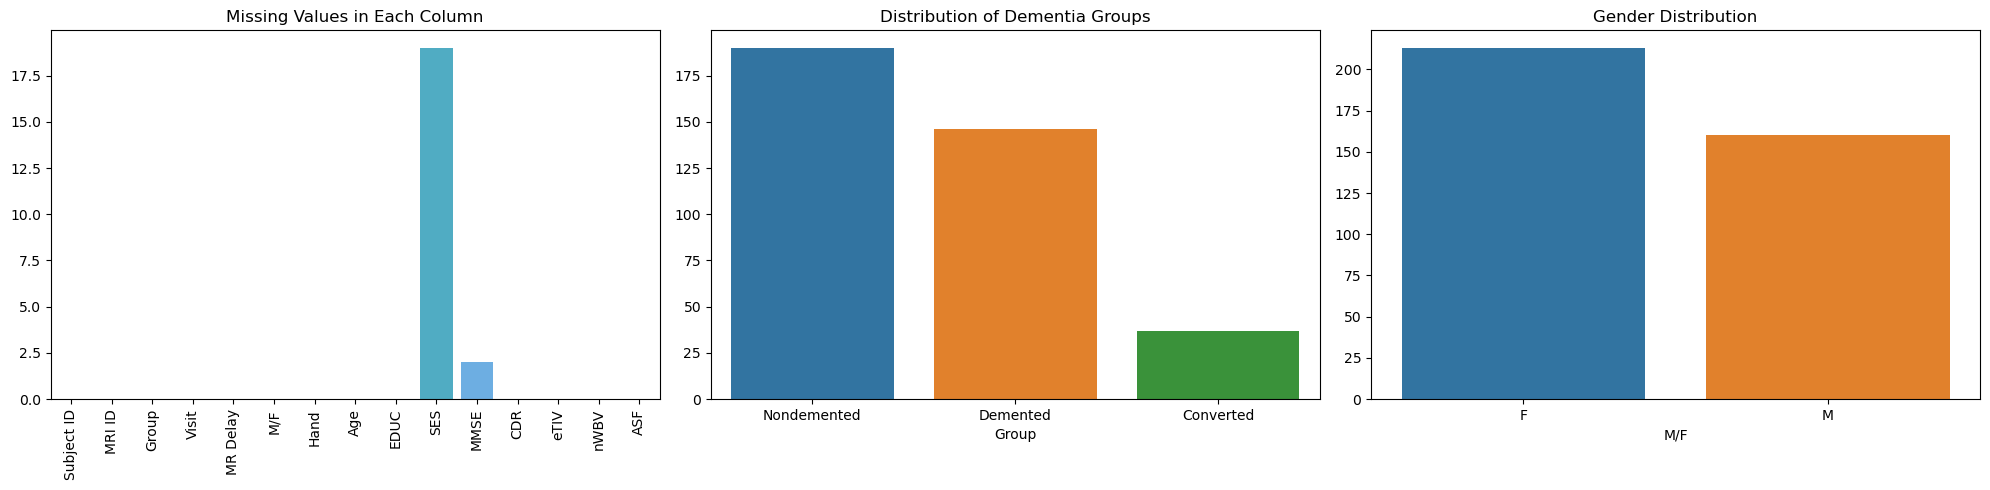

(Subject ID     0
 MRI ID         0
 Group          0
 Visit          0
 MR Delay       0
 M/F            0
 Hand           0
 Age            0
 EDUC           0
 SES           19
 MMSE           2
 CDR            0
 eTIV           0
 nWBV           0
 ASF            0
 dtype: int64,
 Group
 Nondemented    190
 Demented       146
 Converted       37
 Name: count, dtype: int64,
 count    373.000000
 mean      77.013405
 std        7.640957
 min       60.000000
 25%       71.000000
 50%       77.000000
 75%       82.000000
 max       98.000000
 Name: Age, dtype: float64,
 M/F
 F    213
 M    160
 Name: count, dtype: int64)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initial data analysis and visualization

# Checking for missing values
missing_values = dementia_data.isnull().sum()

# Distribution of the target variable 'Group'
group_distribution = dementia_data['Group'].value_counts()

# Age distribution
age_distribution = dementia_data['Age'].describe()

# Gender distribution
gender_distribution = dementia_data['M/F'].value_counts()

# Visualizations
plt.figure(figsize=(20, 5))

# Plot for missing values
plt.subplot(1, 3, 1)
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Each Column")

# Plot for group distribution
plt.subplot(1, 3, 2)
sns.barplot(x=group_distribution.index, y=group_distribution.values)
plt.title("Distribution of Dementia Groups")

# Plot for gender distribution
plt.subplot(1, 3, 3)
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title("Gender Distribution")

plt.tight_layout()
plt.show()

missing_values, group_distribution, age_distribution, gender_distribution


c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


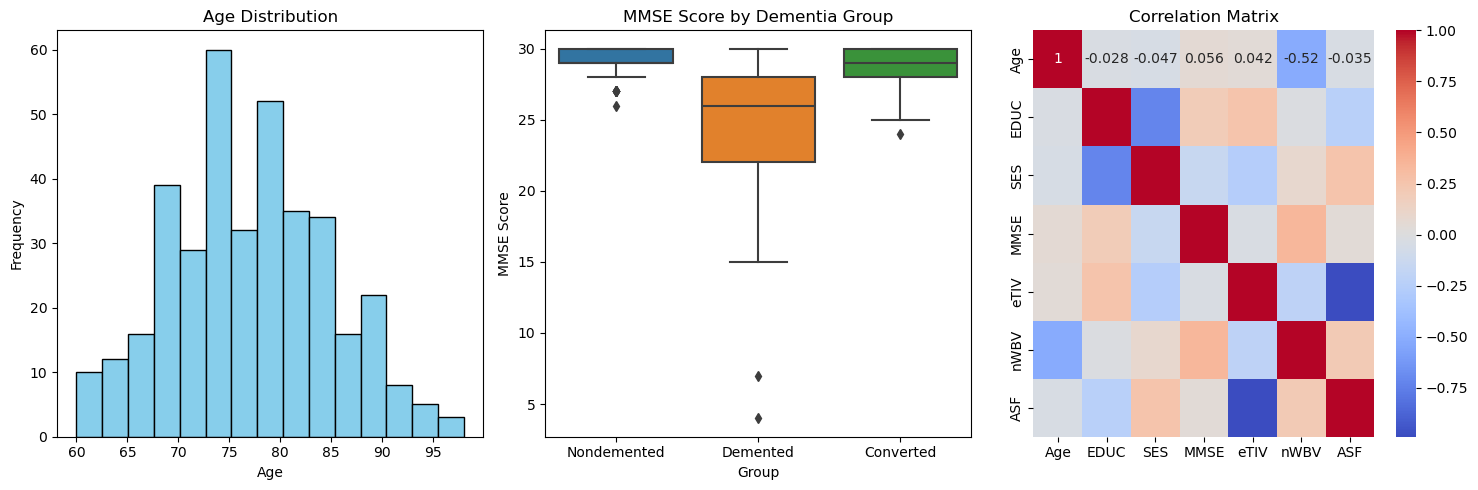

In [3]:
# Plotting appropriate graphs for the dementia dataset project

# 1. Histogram for Age Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(dementia_data['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Box Plot for MMSE (Mini-Mental State Examination) scores
plt.subplot(1, 3, 2)
sns.boxplot(x='Group', y='MMSE', data=dementia_data)
plt.title('MMSE Score by Dementia Group')
plt.xlabel('Group')
plt.ylabel('MMSE Score')

# 3. Heatmap for Correlations between features
plt.subplot(1, 3, 3)
corr_matrix = dementia_data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()



    ## Data Cleaning and Feature Engineering
    Preparing the data for modeling by handling missing values, feature scaling, and engineering.
    

In [4]:
# Data Cleaning

# Imputing missing values for SES with its mode
ses_mode = dementia_data['SES'].mode()[0]
dementia_data['SES'].fillna(ses_mode, inplace=True)

# Imputing missing values for MMSE with its median
mmse_median = dementia_data['MMSE'].median()
dementia_data['MMSE'].fillna(mmse_median, inplace=True)

# Feature Engineering
# For demonstration, let's create a new feature 'AgeGroup' to categorize subjects into age groups
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90-99']
dementia_data['AgeGroup'] = pd.cut(dementia_data['Age'], bins=bins, labels=labels, right=False)

# Feature Scaling
# Scaling continuous features like 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', and 'ASF'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = dementia_data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
scaled_features = scaler.fit_transform(scaled_features)

# Replacing original columns with scaled values
dementia_data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] = scaled_features

# Checking the dataset after cleaning and feature engineering
dementia_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,AgeGroup
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,1.308738,-0.208132,-0.394466,-0.095686,0.0,2.836059,-0.905169,-2.265742,80-89
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,1.439787,-0.208132,-0.394466,0.721664,0.0,2.932703,-1.309643,-2.316501,80-89
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,-0.263856,-0.904394,-0.394466,-1.185486,0.5,1.079409,0.173429,-1.083784,70-79
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,-0.132806,-0.904394,-0.394466,0.176764,0.5,1.420506,-0.446765,-1.344830,70-79
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,0.391392,-0.904394,-0.394466,-1.457936,0.5,1.193108,-0.770344,-1.170800,80-89



    ## Applying Machine Learning Algorithms
    Implementing and evaluating different machine learning models such as Logistic Regression, Random Forest, and SVM.
    

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Preparing the data for modeling
# Encoding the categorical variables
dementia_data_encoded = pd.get_dummies(dementia_data, columns=['Group', 'M/F', 'Hand', 'AgeGroup'], drop_first=True)

# Separating the features and the target variable
X = dementia_data_encoded.drop(['Subject ID', 'MRI ID', 'Group_Demented', 'Group_Nondemented'], axis=1)
y = dementia_data_encoded['Group_Nondemented']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying various machine learning algorithms
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluating the models
log_reg_report = classification_report(y_test, y_pred_log_reg)
rf_report = classification_report(y_test, y_pred_rf)
svm_report = classification_report(y_test, y_pred_svm)

log_reg_report, rf_report, svm_report


('              precision    recall  f1-score   support\n\n       False       0.97      0.81      0.89        43\n        True       0.79      0.97      0.87        32\n\n    accuracy                           0.88        75\n   macro avg       0.88      0.89      0.88        75\nweighted avg       0.90      0.88      0.88        75\n',
 '              precision    recall  f1-score   support\n\n       False       0.97      0.84      0.90        43\n        True       0.82      0.97      0.89        32\n\n    accuracy                           0.89        75\n   macro avg       0.89      0.90      0.89        75\nweighted avg       0.91      0.89      0.89        75\n',
 '              precision    recall  f1-score   support\n\n       False       0.58      0.33      0.42        43\n        True       0.43      0.69      0.53        32\n\n    accuracy                           0.48        75\n   macro avg       0.51      0.51      0.47        75\nweighted avg       0.52      0.48      0.


    ## Deep Learning Model Template (TensorFlow)
    This section is a template for a deep learning model using TensorFlow. Since TensorFlow is not available in this environment, 
    this section is commented out. You can run this on your local machine with TensorFlow installed.
    

Fitting 5 folds for each of 108 candidates, totalling 540 fits


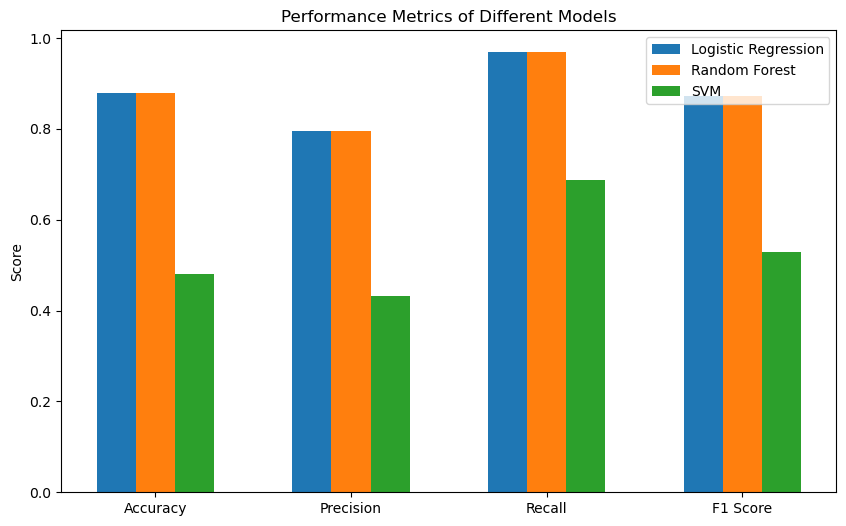

(RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42),
 (0.88, 0.7948717948717948, 0.96875, 0.8732394366197183))

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for Random Forest Classifier
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=rf_params, 
                              cv=5, 
                              verbose=2, 
                              n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)
best_rf_clf = grid_search_rf.best_estimator_

# Predictions using the best Random Forest model
y_pred_best_rf = best_rf_clf.predict(X_test)

# Metrics calculation for the best Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
precision_rf = precision_score(y_test, y_pred_best_rf)
recall_rf = recall_score(y_test, y_pred_best_rf)
f1_rf = f1_score(y_test, y_pred_best_rf)

# Metrics for original models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Plotting the performance metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_metrics = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
plt.bar(x - 0.2, log_reg_metrics, width=0.2, label='Logistic Regression')
plt.bar(x, rf_metrics, width=0.2, label='Random Forest')
plt.bar(x + 0.2, svm_metrics, width=0.2, label='SVM')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Performance Metrics of Different Models")
plt.legend()
plt.show()

best_rf_clf, (accuracy_rf, precision_rf, recall_rf, f1_rf)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


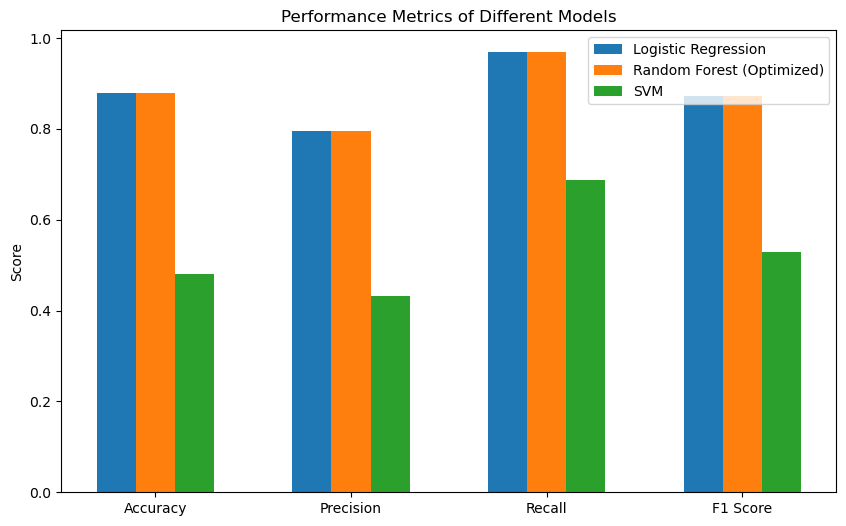

(RandomForestClassifier(random_state=42),
 (0.8933333333333333, 0.8333333333333334, 0.9375, 0.8823529411764706))

In [7]:
# Hyperparameter tuning for Random Forest Classifier without SMOTE
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=rf_params, 
                              cv=5, 
                              verbose=2, 
                              n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_clf = grid_search_rf.best_estimator_

# Predictions using the best Random Forest model
y_pred_best_rf = best_rf_clf.predict(X_test)

# Metrics calculation for the best Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
precision_rf = precision_score(y_test, y_pred_best_rf)
recall_rf = recall_score(y_test, y_pred_best_rf)
f1_rf = f1_score(y_test, y_pred_best_rf)

# Plotting the performance metrics for all models
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
plt.bar(x - 0.2, log_reg_metrics, width=0.2, label='Logistic Regression')
plt.bar(x, rf_metrics, width=0.2, label='Random Forest (Optimized)')
plt.bar(x + 0.2, svm_metrics, width=0.2, label='SVM')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Performance Metrics of Different Models")
plt.legend()
plt.show()

best_rf_clf, (accuracy_rf, precision_rf, recall_rf, f1_rf)


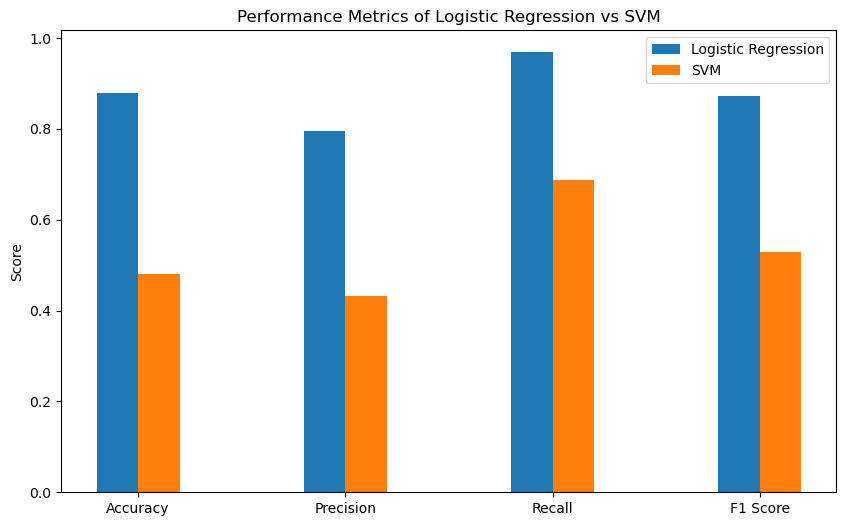

In [10]:
# Recalculating the metrics for Logistic Regression and SVM models

# Metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
log_reg_metrics = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg]

# Metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]

# Plotting the performance metrics for the original Logistic Regression and SVM models
plt.figure(figsize=(10, 6))
x_labels = np.arange(len(metrics_labels))
plt.bar(x_labels - 0.1, log_reg_metrics, width=0.2, label='Logistic Regression')
plt.bar(x_labels + 0.1, svm_metrics, width=0.2, label='SVM')
plt.xticks(x_labels, metrics_labels)
plt.ylabel("Score")
plt.title("Performance Metrics of Logistic Regression vs SVM")
plt.legend()
plt.show()


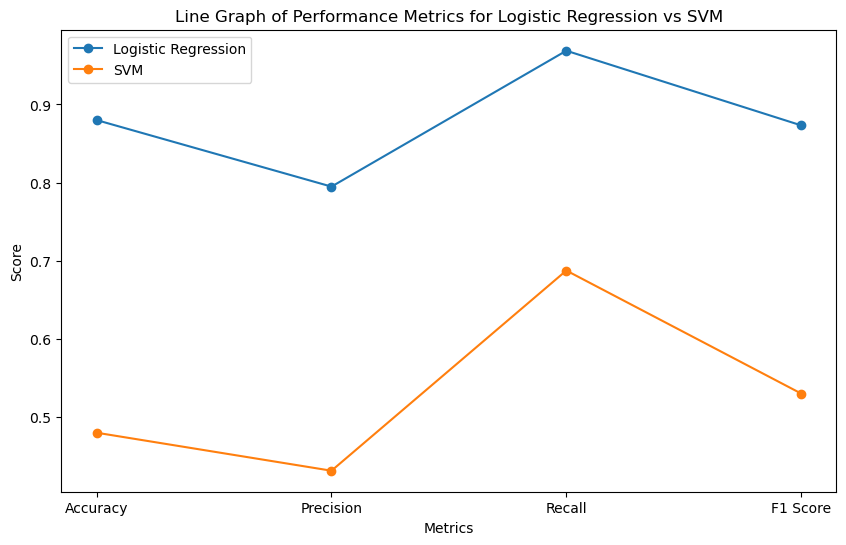

In [11]:
# Plotting a line graph for the performance metrics of Logistic Regression and SVM models

plt.figure(figsize=(10, 6))

# Plotting lines for Logistic Regression and SVM
plt.plot(metrics_labels, log_reg_metrics, marker='o', label='Logistic Regression')
plt.plot(metrics_labels, svm_metrics, marker='o', label='SVM')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Line Graph of Performance Metrics for Logistic Regression vs SVM')
plt.legend()

plt.show()


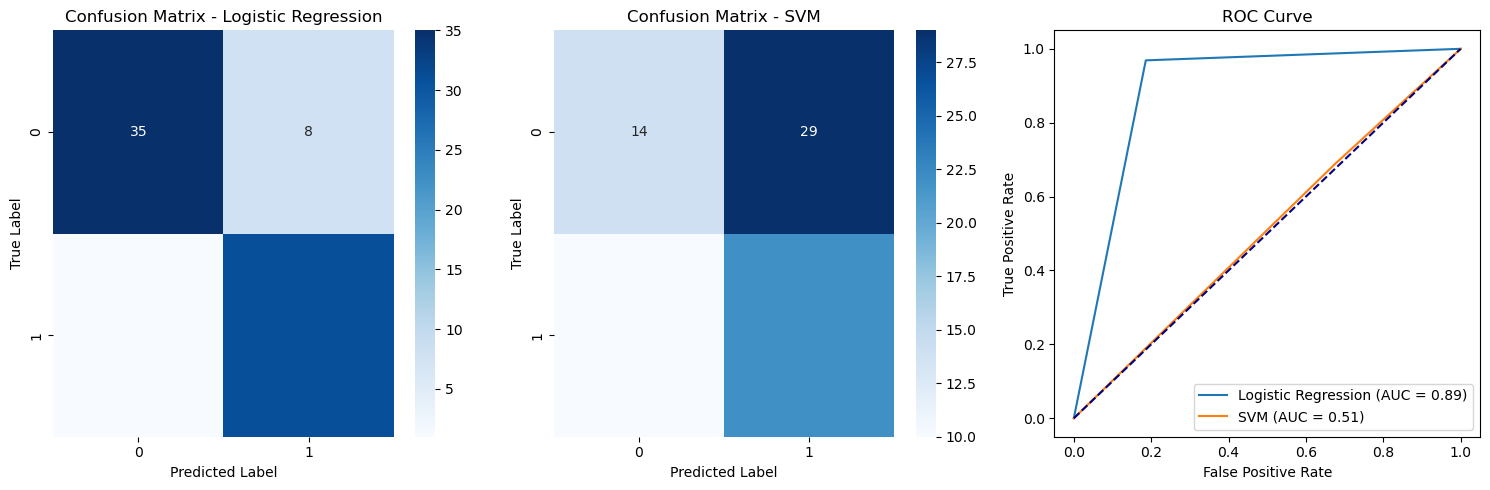

(0.8913517441860466, 0.5065406976744187)

In [12]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calculating additional metrics and plotting graphs for Logistic Regression and SVM

# Confusion Matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# ROC Curves and AUC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting
plt.figure(figsize=(15, 5))

# Confusion Matrix for Logistic Regression
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion Matrix for SVM
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

roc_auc_log_reg, roc_auc_svm


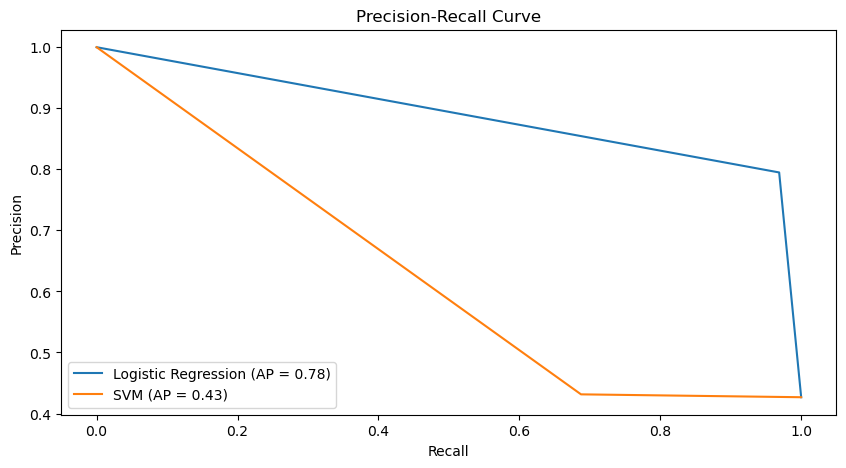

(0.8913517441860466,
 0.5065406976744187,
 0.7833653846153845,
 0.42990196078431375)

In [13]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

# Calculating additional metrics for Logistic Regression and SVM models

# ROC AUC Score
roc_auc_score_log_reg = roc_auc_score(y_test, y_pred_log_reg)
roc_auc_score_svm = roc_auc_score(y_test, y_pred_svm)

# Precision-Recall Curve and Average Precision Score
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_pred_log_reg)
ap_score_log_reg = average_precision_score(y_test, y_pred_log_reg)

precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_svm)
ap_score_svm = average_precision_score(y_test, y_pred_svm)

# Plotting Precision-Recall Curves
plt.figure(figsize=(10, 5))

plt.plot(recall_log_reg, precision_log_reg, label=f'Logistic Regression (AP = {ap_score_log_reg:.2f})')
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_score_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.show()

# Displaying ROC AUC scores and Average Precision scores
roc_auc_score_log_reg, roc_auc_score_svm, ap_score_log_reg, ap_score_svm


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Convert the data to float32 if not already
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [32]:

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model summary
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                480       
                                                                 
 dense_61 (Dense)            (None, 16)                528       
                                                                 
 dense_62 (Dense)            (None, 8)                 136       
                                                                 
 dense_63 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 1s 12ms/step - loss: 9.7245 - accuracy: 0.4664 - val_loss: 2.3804 - val_accuracy: 0.4500
Epoch 2/200

In [33]:
# model.save('modeldementia.h5')

c:\Users\alias\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


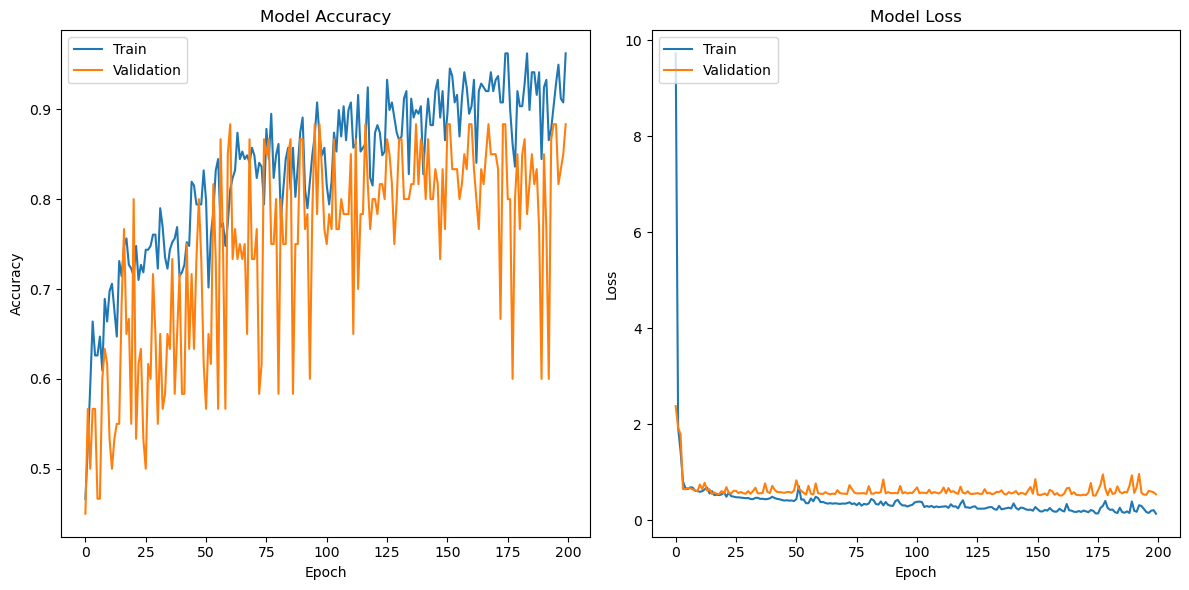

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
